# Importing librarires

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Embedding, Dropout, GlobalAveragePooling1D, Flatten, SpatialDropout1D, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import tqdm

# Reading the corpus

*   Reading training data from [corpus.xlsx](https://docs.google.com/spreadsheets/d/1fYERAxi5YWi0eP7M5txpOr0sfNMuNuKm/edit?usp=drive_web&ouid=105822911867262178394&rtpof=true)
*   Reading test data from [corpus-test.xlsx](https://docs.google.com/spreadsheets/d/1HHQn69_gzqE7ibNMgqQwseY--7SiatwG/edit?usp=drive_web&ouid=105822911867262178394&rtpof=true)

## Training data

In [ ]:
train_df = pd.read_excel('/content/drive/MyDrive/aml_excel_new/corpus.xlsx')
print(train_df.shape)
train_df.head()

(493829, 7)


,reviewText,summary,overall,numberofWords,numberofSentences,reviewLength,summaryLength
0,nearly large enough front rear 2005 dodge ram ...,nearly large enough front rear,1,26,1,150,55
1,2 3 broke first day wearing glad kept spare ba...,glad kept spare back set goggles,1,30,1,158,46
2,bearing groaned whined box ended sourcing delc...,one star,1,10,1,70,8
3,think product good claimed bottom line efficie...,would buy,1,46,1,304,24
4,poor reception,one star,1,2,1,14,8


## Verifying no missing value for training set

In [ ]:
train_df.isnull().sum()

reviewText           0
summary              0
overall              0
numberofWords        0
numberofSentences    0
reviewLength         0
summaryLength        0
dtype: int64

In [ ]:
train_df = train_df.dropna(subset=['reviewText', 'summary', 'overall'])
print(train_df.shape)

(493829, 7)


## Test data

In [ ]:
test_df = pd.read_excel('/content/drive/MyDrive/aml_excel_new/corpus-test.xlsx', usecols=['reviewText', 'summary', 'overall'])
print(test_df.shape)
test_df.head()

(23720, 3)


,reviewText,summary,overall
0,received didnt check saw need ran went use spr...,bad wont spray,1
1,didnt work didnt get warm buy save money buy n...,save money,1
2,must obeyed made clear like product period lis...,chemical mostlyvery little melon,1
3,name shade clearly pink left pink absolutely c...,color expected,1
4,came inside plastic bag half bottle spilled ev...,totally wasted half product,1


## Verifying no missing value for test data

In [ ]:
test_df.isnull().sum()

reviewText    0
summary       0
overall       0
dtype: int64

In [ ]:
test_df = test_df.dropna(subset=['reviewText', 'summary', 'overall'])
print(test_df.shape)

(23720, 3)


# Preparing training, validation and test set

In [ ]:
X = train_df['reviewText'] + ' ' + train_df['summary']
y = train_df['overall']

In [ ]:
# When considering full training
X_train = train_df['reviewText'] + ' ' + train_df['summary']
y_train = train_df['overall']

In [ ]:
print(len(X_train))
print(len(y_train))

493829
493829


In [ ]:
#test_texts = test_df['reviewText'] + ' ' + test_df['summary']
X_test = test_df['reviewText'] + ' ' + test_df['summary']
y_test = test_df['overall']

In [ ]:
print(len(X_test))
print(len(y_test))

23720
23720


In [ ]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(len(X_train))
print(len(y_train))
print(len(X_val))
print(len(y_val))
print(len(X_test))
print(len(y_test))

395063
395063
98766
98766
23720
23720


## Tokenization

In [ ]:
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>' # out of vocabulary token
max_words = 50000

In [ ]:
tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(X_train)

In [ ]:
# Get the word_index
word_index = tokenizer.word_index
total_words = len(word_index)
total_words

559793

In [ ]:
vocab_size = len(tokenizer.word_index)
vocab_size

559793

In [ ]:
max_length = 500

## Sequence and padding

In [ ]:
# Sequence for train set
training_sequences = tokenizer.texts_to_sequences(X_train)
print(X_train[10:12])
print(training_sequences[10:12])

10    plastic portion filter warped slight bowed sha...
11                                    powerful one star
dtype: object
[[131, 1838, 420, 3241, 1551, 10768, 798, 344, 6571, 474, 339, 7, 2020, 5, 973, 1142, 18502, 401, 3047, 893, 29, 595, 474, 74, 753, 272, 178, 65, 6837, 3727], [766, 1, 10]]


In [ ]:
# Padding for train set
training_padded = pad_sequences(training_sequences,
                                maxlen = max_length,
                                padding = padding_type,
                                truncating = trunc_type)
training_padded.shape

(493829, 500)

In [ ]:
training_padded[10]

array([17119,    69,  4470,    86, 12001,    27,    11,   166,   345,
         144,  1675,    31, 28759,    92, 27857,    20,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [ ]:
print(X_train[11])
print(training_sequences[11])
print(training_padded[11])

powerful one star
[766, 1, 10]
[766   1  10   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0

In [ ]:
# Sequence and padding for validation set
val_sequences = tokenizer.texts_to_sequences(X_val)
val_padded = pad_sequences(val_sequences,
                           maxlen = max_length,
                           padding = padding_type,
                           truncating = trunc_type)

In [ ]:
print('Shape of validation tensor: ', val_padded.shape)

Shape of validation tensor:  (98766, 500)


In [ ]:
# Sequence and padding for test set
testing_sequences = tokenizer.texts_to_sequences(X_test)
testing_padded = pad_sequences(testing_sequences,
                               maxlen = max_length,
                               padding = padding_type,
                               truncating = trunc_type)

In [ ]:
print('Shape of testing tensor: ', testing_padded.shape)

Shape of testing tensor:  (23720, 500)


## Encode labels

In [ ]:
# Encode labels using LabelEncoder
label_encoder = LabelEncoder()
encoded_train_labels = label_encoder.fit_transform(y_train)
encoded_test_labels = label_encoder.transform(y_test)

In [ ]:
encoded_val_labels = label_encoder.transform(y_val)

## Load the GloVe vectors

In [ ]:
# Creating embedding index
embedding_index = {}
with open('/content/drive/MyDrive/glove.42B.300d.txt', 'r', encoding='utf-8') as f:
  for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embedding_index[word] = coefs

In [ ]:
len(embedding_index)

1917494

In [ ]:
embedding_index['good']

array([-6.9254e-02,  3.7668e-01, -1.6958e-01, -2.7482e-01,  2.5667e-01,
       -2.0293e-01, -4.1122e+00,  2.5950e-02, -2.7085e-01, -8.7003e-01,
       -1.0262e-02, -1.0048e-01, -6.1710e-02, -2.1110e-01, -3.7652e-01,
        1.0446e-01,  5.4106e-02, -2.5225e-01, -1.2505e-01, -1.3461e-01,
        3.4004e-01, -2.8599e-01,  4.8589e-02, -8.8778e-02, -1.0750e-01,
       -4.1175e-01, -1.5396e-01,  4.3628e-02,  2.5690e-01,  7.2977e-02,
        5.4217e-03,  1.7869e-01,  3.3359e-02, -1.4776e-01,  2.9636e-01,
       -2.2996e-02, -1.4727e-01, -1.3191e-01, -1.0101e-01, -8.7417e-02,
        3.7875e-01,  4.5906e-01,  1.5273e-01, -4.6257e-01,  1.0971e-01,
        1.1215e-01,  3.5370e-01, -7.0427e-02,  1.2163e-01,  1.4172e-01,
        1.4460e-01,  2.5895e-01, -3.3227e-01,  7.9101e-02, -3.5241e-01,
       -2.2890e-01,  2.2345e-01, -7.8325e-01,  9.2271e-02, -8.5687e-04,
        9.0918e-02, -2.4656e-01,  4.2705e-01,  3.9094e-01,  1.7893e-01,
       -3.8450e-01,  1.6025e-01,  2.7283e-01, -6.8650e-02, -6.05

In [ ]:
# Creating embedding matrix
embedding_matrix = np.zeros((vocab_size, 300))
for word, i in word_index.items():
  embedding_vector = embedding_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [ ]:
embedding_matrix.shape

(559793, 300)

# Visualizations

In [ ]:
def visualize_loss_accuracy(history, title):
  # Plot accuracy and loss over epochs
  plt.figure(figsize=(12, 4))

  # Plot Training & Validation Accuracy
  plt.subplot(1, 2, 1)
  plt.plot(history.history['accuracy'], label='Training Accuracy')
  plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
  plt.title('Training & Validation Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()

  # Plot Training & Validation Loss
  plt.subplot(1, 2, 2)
  plt.plot(history.history['loss'], label='Training Loss')
  plt.plot(history.history['val_loss'], label='Validation Loss')
  plt.title('Training & Validation Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()

  plt.suptitle(title, y=1.02, fontsize=16)

  plt.tight_layout()
  plt.show()

# Defining models

In [ ]:
embedding_dim = 128

In [ ]:
drop_value = 0.2
num_epochs = 30
# n_dense = 24
batch_size = 128

## LSTM

LSTM model is used for classification

### Defining model architecture and training

In [ ]:
# Define parameter
n_lstm = 128

model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=vocab_size,
                        output_dim=embedding_dim,
                        input_length=max_length))
model_lstm.add(SpatialDropout1D(drop_value))
model_lstm.add(LSTM(n_lstm, return_sequences=False))
model_lstm.add(Dropout(drop_value))
model_lstm.add(Dense(5, activation='softmax'))

In [ ]:
model_lstm.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 500, 128)          62005376  
                                                                 
 spatial_dropout1d_2 (Spati  (None, 500, 128)          0         
 alDropout1D)                                                    
                                                                 
 lstm_2 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 5)                 645       
                                                                 
Total params: 62137605 (237.04 MB)
Trainable params: 62137605 (237.04 MB)
Non-trainable params: 0 (0.00 Byte)
__________

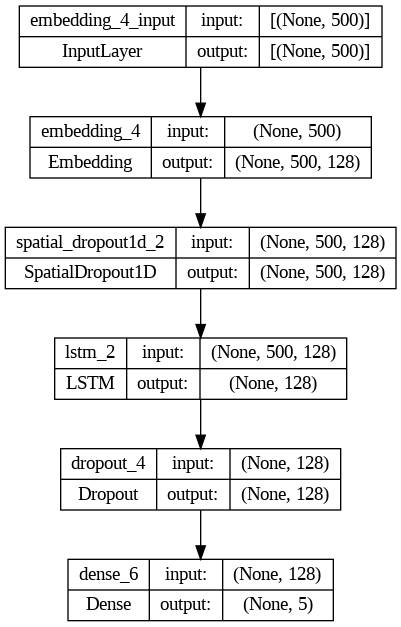

In [ ]:
# Visualize the model architecture
plot_model(model_lstm, to_file='model_lstm.png', show_shapes=True, show_layer_names=True)

In [ ]:
model_lstm.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=3)
history_lstm = model_lstm.fit(training_padded,
                              encoded_train_labels,
                              epochs=num_epochs,
                              validation_data=(val_padded, encoded_val_labels),
                              callbacks=[early_stop],
                              batch_size=batch_size,
                              verbose=1)

Epoch 1/30
3087/3087 [==============================] - 248s 80ms/step - loss: 1.6098 - accuracy: 0.2007 - val_loss: 1.6109 - val_accuracy: 0.2012
Epoch 2/30
3087/3087 [==============================] - 165s 53ms/step - loss: 1.6093 - accuracy: 0.2010 - val_loss: 1.6091 - val_accuracy: 0.2013
Epoch 3/30
3087/3087 [==============================] - 177s 57ms/step - loss: 1.6080 - accuracy: 0.2006 - val_loss: 1.6087 - val_accuracy: 0.2012
Epoch 4/30
3087/3087 [==============================] - 167s 54ms/step - loss: 1.6072 - accuracy: 0.2009 - val_loss: 1.6089 - val_accuracy: 0.2013
Epoch 5/30
3087/3087 [==============================] - 154s 50ms/step - loss: 1.6063 - accuracy: 0.2018 - val_loss: 1.6098 - val_accuracy: 0.2012
Epoch 6/30
3087/3087 [==============================] - 151s 49ms/step - loss: 1.6057 - accuracy: 0.2024 - val_loss: 1.6111 - val_accuracy: 0.2012


### Visualization - LSTM

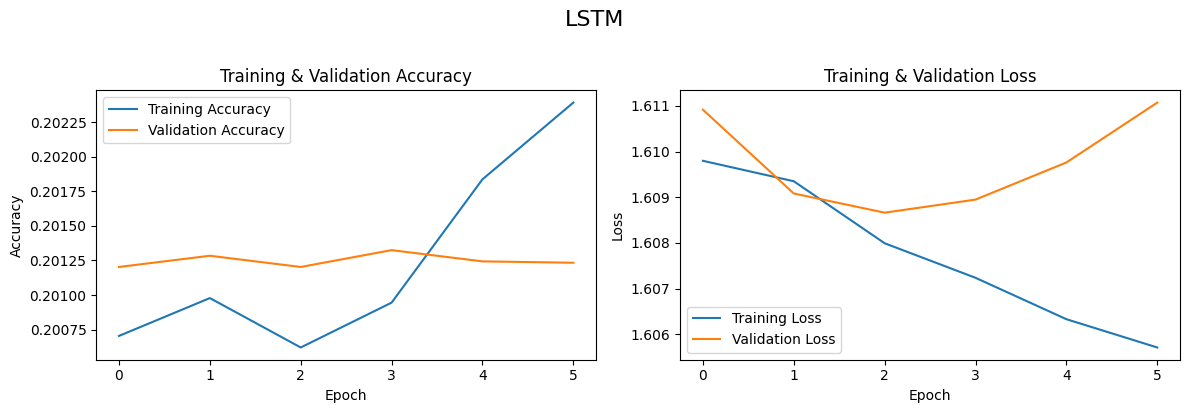

In [ ]:
visualize_loss_accuracy(history_lstm, title='LSTM')

### Accuracy - LSTM

In [ ]:
test_loss, test_accuracy = model_lstm.evaluate(testing_padded, encoded_test_labels)
print(f'Test Accuracy: {test_accuracy}')

742/742 [==============================] - 7s 9ms/step - loss: 1.6079 - accuracy: 0.5358
Test Accuracy: 0.5358347296714783


### Classification Report - LSTM

In [ ]:
predictions = model_lstm.predict(testing_padded)
predicted_labels = label_encoder.inverse_transform(predictions.argmax(axis=1))

print("Classification Report:")
print(classification_report(y_test, predicted_labels))

742/742 [==============================] - 7s 9ms/step
Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       690
           2       0.00      0.00      0.00      1075
           3       0.00      0.00      0.00      3014
           4       0.50      0.00      0.00      6225
           5       0.54      1.00      0.70     12716

    accuracy                           0.54     23720
   macro avg       0.21      0.20      0.14     23720
weighted avg       0.42      0.54      0.37     23720



### Confusion Matrix - LSTM

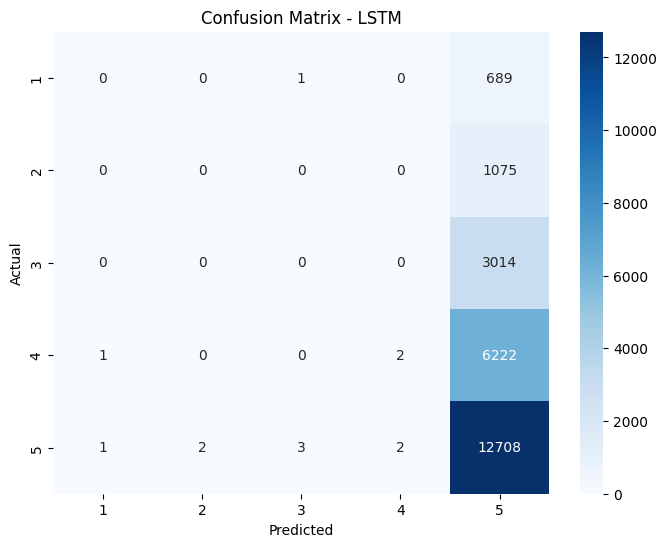

In [ ]:
conf_matrix = confusion_matrix(y_test, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix - LSTM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Bidirectional LSTM (Bi-LSTM)

In [ ]:
n_lstm = 128

model_bi_lstm = Sequential()
model_bi_lstm.add(Embedding(input_dim=vocab_size,
                            output_dim=embedding_dim,
                            input_length=max_length))
model_bi_lstm.add(Bidirectional(LSTM(n_lstm,
                                     return_sequences = False)))
model_bi_lstm.add(Dropout(drop_value))
model_bi_lstm.add(Dense(5, activation='softmax'))

In [ ]:
model_bi_lstm.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 500, 128)          62005376  
                                                                 
 bidirectional_1 (Bidirecti  (None, 256)               263168    
 onal)                                                           
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 62269829 (237.54 MB)
Trainable params: 62269829 (237.54 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


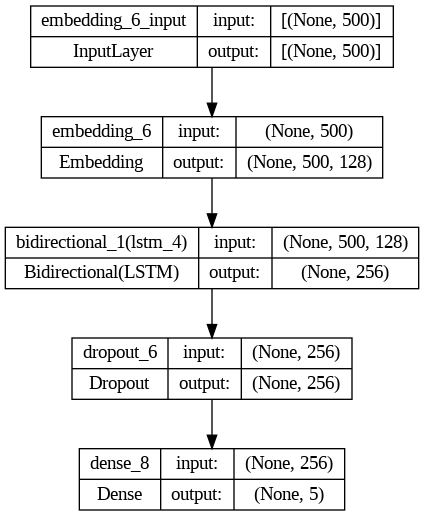

In [ ]:
# Visualize the model architecture
plot_model(model_bi_lstm, to_file='model_bi_lstm.png', show_shapes=True, show_layer_names=True)

In [ ]:
model_bi_lstm.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=3)
history_bi_lstm = model_bi_lstm.fit(training_padded,
                    encoded_train_labels,
                    epochs=num_epochs,
                    validation_data=(val_padded, encoded_val_labels),
                    callbacks=[early_stop],
                    verbose=1)

Epoch 1/30
12346/12346 [==============================] - 800s 64ms/step - loss: 0.9810 - accuracy: 0.5852 - val_loss: 0.8943 - val_accuracy: 0.6219
Epoch 2/30
12346/12346 [==============================] - 660s 53ms/step - loss: 0.7854 - accuracy: 0.6779 - val_loss: 0.8982 - val_accuracy: 0.6260
Epoch 3/30
12346/12346 [==============================] - 655s 53ms/step - loss: 0.5819 - accuracy: 0.7698 - val_loss: 0.9938 - val_accuracy: 0.6165
Epoch 4/30
12346/12346 [==============================] - 660s 53ms/step - loss: 0.4322 - accuracy: 0.8291 - val_loss: 1.1341 - val_accuracy: 0.6111


### Visualization - Bidirectional LSTM

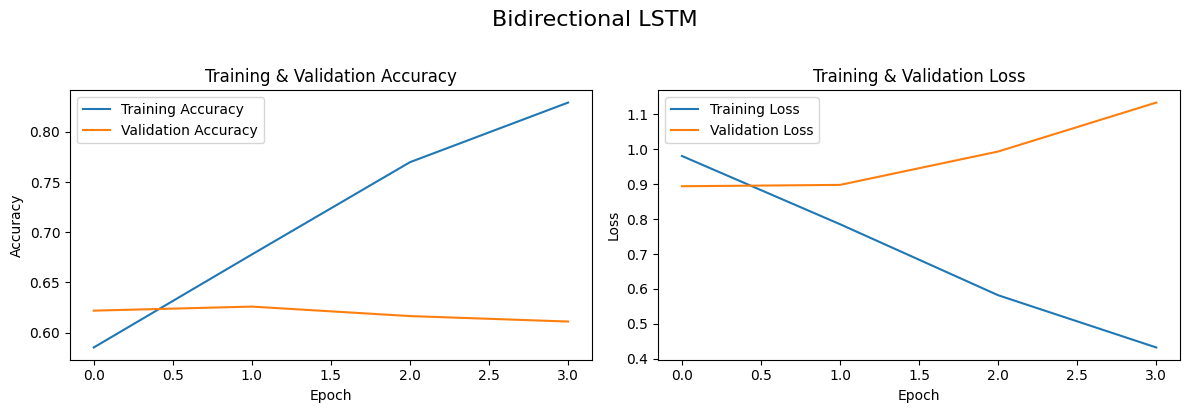

In [ ]:
visualize_loss_accuracy(history_bi_lstm, title='Bidirectional LSTM')

### Accuracy - Bidirectional LSTM

In [ ]:
test_loss, test_accuracy = model_bi_lstm.evaluate(testing_padded, encoded_test_labels)
print(f'Test Accuracy: {test_accuracy}')

742/742 [==============================] - 12s 16ms/step - loss: 1.8201 - accuracy: 0.5116
Test Accuracy: 0.5115514397621155


### Classification Report - Bidirectional LSTM

In [ ]:
predictions = model_bi_lstm.predict(testing_padded)
predicted_labels = label_encoder.inverse_transform(predictions.argmax(axis=1))

print("Classification Report:")
print(classification_report(y_test, predicted_labels))

742/742 [==============================] - 11s 14ms/step
Classification Report:
              precision    recall  f1-score   support

           1       0.29      0.55      0.38       690
           2       0.18      0.37      0.24      1075
           3       0.26      0.54      0.35      3014
           4       0.44      0.27      0.34      6225
           5       0.79      0.63      0.70     12716

    accuracy                           0.51     23720
   macro avg       0.39      0.47      0.40     23720
weighted avg       0.59      0.51      0.53     23720



### Confusion Matrix - Bidirectional LSTM

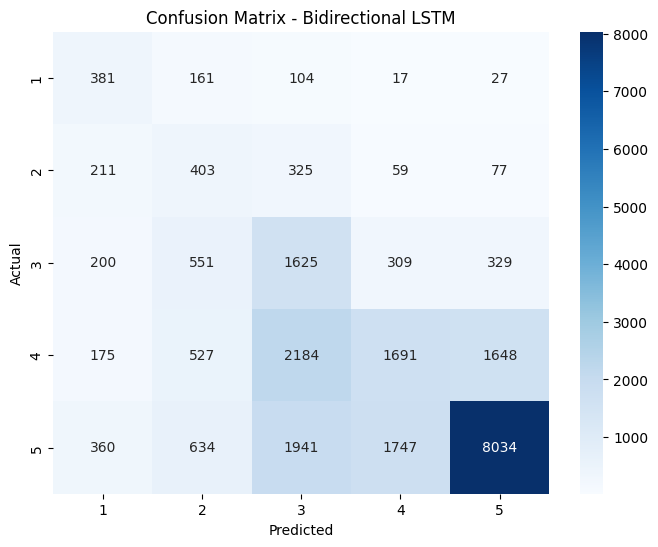

In [ ]:
conf_matrix = confusion_matrix(y_test, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix - Bidirectional LSTM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## GRU

In [ ]:
n_gru = 128

model_gru = Sequential()
model_gru.add(Embedding(input_dim=vocab_size,
                        output_dim=embedding_dim,
                        input_length=max_length))
model_gru.add(SpatialDropout1D(drop_value))
model_gru.add(GRU(n_gru, return_sequences = False))
model_gru.add(Dropout(drop_value))
model_gru.add(Dense(5, activation='softmax'))

In [ ]:
model_gru.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 500, 128)          62005376  
                                                                 
 spatial_dropout1d_3 (Spati  (None, 500, 128)          0         
 alDropout1D)                                                    
                                                                 
 gru (GRU)                   (None, 128)               99072     
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 5)                 645       
                                                                 
Total params: 62105093 (236.91 MB)
Trainable params: 62105093 (236.91 MB)
Non-trainable params: 0 (0.00 Byte)
__________

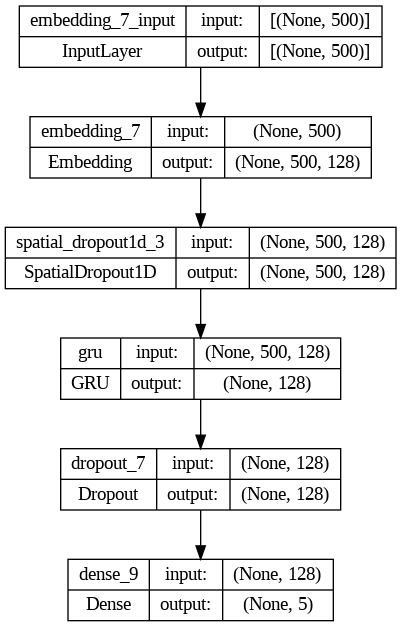

In [ ]:
# Visualize the model architecture
plot_model(model_gru, to_file='model_gru.png', show_shapes=True, show_layer_names=True)

In [ ]:
model_gru.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=3)
history_gru = model_gru.fit(training_padded,
                    encoded_train_labels,
                    epochs=num_epochs,
                    validation_data=(val_padded, encoded_val_labels),
                    callbacks=[early_stop],
					          batch_size=batch_size,
                    verbose=1)

Epoch 1/30
3087/3087 [==============================] - 251s 80ms/step - loss: 1.6098 - accuracy: 0.2010 - val_loss: 1.6099 - val_accuracy: 0.2009
Epoch 2/30
3087/3087 [==============================] - 157s 51ms/step - loss: 1.6088 - accuracy: 0.2009 - val_loss: 1.6088 - val_accuracy: 0.2013
Epoch 3/30
3087/3087 [==============================] - 151s 49ms/step - loss: 1.6077 - accuracy: 0.2015 - val_loss: 1.6093 - val_accuracy: 0.2013
Epoch 4/30
3087/3087 [==============================] - 147s 48ms/step - loss: 1.6064 - accuracy: 0.2033 - val_loss: 1.5968 - val_accuracy: 0.2315
Epoch 5/30
3087/3087 [==============================] - 146s 47ms/step - loss: 1.0104 - accuracy: 0.5645 - val_loss: 0.9162 - val_accuracy: 0.6123
Epoch 6/30
3087/3087 [==============================] - 148s 48ms/step - loss: 0.8013 - accuracy: 0.6681 - val_loss: 0.8962 - val_accuracy: 0.6286
Epoch 7/30
3087/3087 [==============================] - 145s 47ms/step - loss: 0.6370 - accuracy: 0.7444 - val_loss: 0

### Visualization - GRU

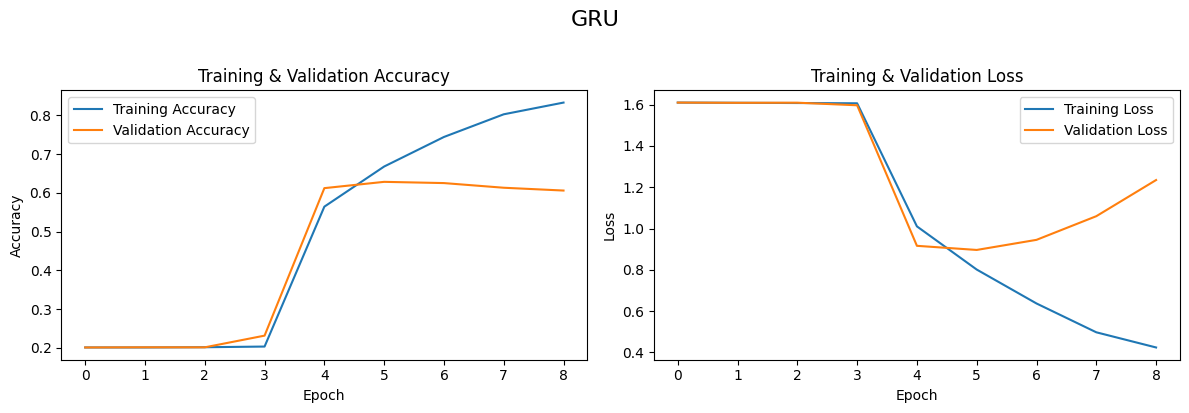

In [ ]:
visualize_loss_accuracy(history_gru, title='GRU')

### Accuracy - GRU

In [ ]:
test_loss, test_accuracy = model_gru.evaluate(testing_padded, encoded_test_labels)
print(f'Test Accuracy: {test_accuracy}')

742/742 [==============================] - 7s 9ms/step - loss: 2.1262 - accuracy: 0.4851
Test Accuracy: 0.48511803150177


### Classification Report - GRU

In [ ]:
predictions = model_gru.predict(testing_padded)
predicted_labels = label_encoder.inverse_transform(predictions.argmax(axis=1))

print("Classification Report:")
print(classification_report(y_test, predicted_labels))

742/742 [==============================] - 7s 9ms/step
Classification Report:
              precision    recall  f1-score   support

           1       0.33      0.50      0.40       690
           2       0.20      0.36      0.25      1075
           3       0.24      0.60      0.35      3014
           4       0.41      0.31      0.35      6225
           5       0.82      0.55      0.66     12716

    accuracy                           0.49     23720
   macro avg       0.40      0.47      0.40     23720
weighted avg       0.60      0.49      0.51     23720



### Confusion Matrix - GRU

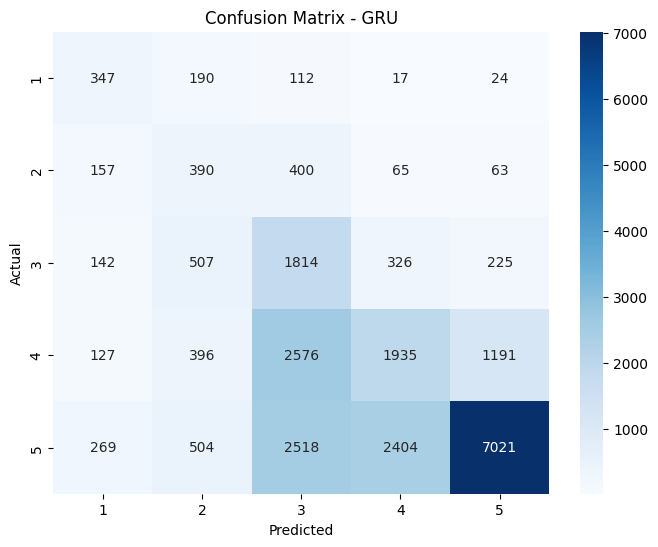

In [ ]:
conf_matrix = confusion_matrix(y_test, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix - GRU')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## LSTM with GloVe embedding

In [ ]:
# Define parameter
n_lstm = 128
embedding_dim = 300 # Based on the Glove embedding

model_lstm_glove = Sequential()
model_lstm_glove.add(Embedding(input_dim=vocab_size,
                               output_dim=embedding_dim,
                               trainable = False,
                               weights=[embedding_matrix]))
model_lstm_glove.add(SpatialDropout1D(drop_value))
model_lstm_glove.add(LSTM(n_lstm, return_sequences=False))
model_lstm_glove.add(Dropout(drop_value))
model_lstm_glove.add(Dense(5, activation='softmax'))

In [ ]:
model_lstm_glove.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 300)         145325100 
                                                                 
 spatial_dropout1d_3 (Spati  (None, None, 300)         0         
 alDropout1D)                                                    
                                                                 
 lstm_3 (LSTM)               (None, 128)               219648    
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 5)                 645       
                                                                 
Total params: 145545393 (555.21 MB)
Trainable params: 220293 (860.52 KB)
Non-trainable params: 145325100 (554.37 MB)
___

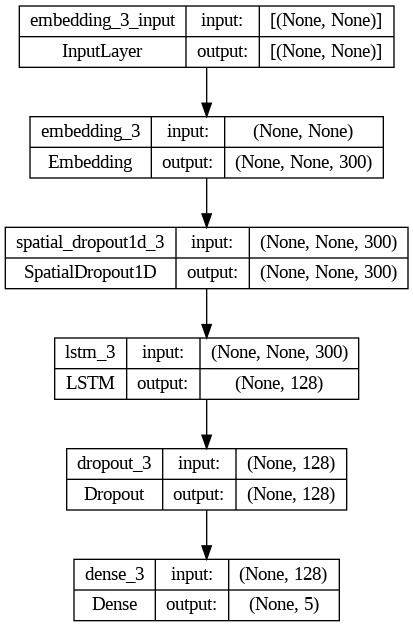

In [ ]:
# Visualize the model architecture
plot_model(model_lstm_glove, to_file='model_lstm_glove.png', show_shapes=True, show_layer_names=True)

In [ ]:
model_lstm_glove.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=3)
history_lstm_glove = model_lstm_glove.fit(training_padded,
                                    encoded_train_labels,
                                    epochs=num_epochs,
                                    validation_data=(val_padded, encoded_val_labels),
                                    callbacks=[early_stop],
					                          batch_size=batch_size,
                                    verbose=1)

Epoch 1/30
3087/3087 [==============================] - 142s 46ms/step - loss: 1.6093 - accuracy: 0.2010 - val_loss: 1.6093 - val_accuracy: 0.2010
Epoch 2/30
3087/3087 [==============================] - 150s 49ms/step - loss: 1.6088 - accuracy: 0.2016 - val_loss: 1.6195 - val_accuracy: 0.1997
Epoch 3/30
3087/3087 [==============================] - 143s 46ms/step - loss: 1.1167 - accuracy: 0.5171 - val_loss: 0.9590 - val_accuracy: 0.5920
Epoch 4/30
3087/3087 [==============================] - 151s 49ms/step - loss: 0.9636 - accuracy: 0.5898 - val_loss: 0.9250 - val_accuracy: 0.6067
Epoch 5/30
3087/3087 [==============================] - 143s 46ms/step - loss: 0.9208 - accuracy: 0.6086 - val_loss: 0.9004 - val_accuracy: 0.6170
Epoch 6/30
3087/3087 [==============================] - 151s 49ms/step - loss: 0.8969 - accuracy: 0.6194 - val_loss: 0.8881 - val_accuracy: 0.6212
Epoch 7/30
3087/3087 [==============================] - 151s 49ms/step - loss: 0.8750 - accuracy: 0.6284 - val_loss: 0

### Visualization - LSTM with GloVe

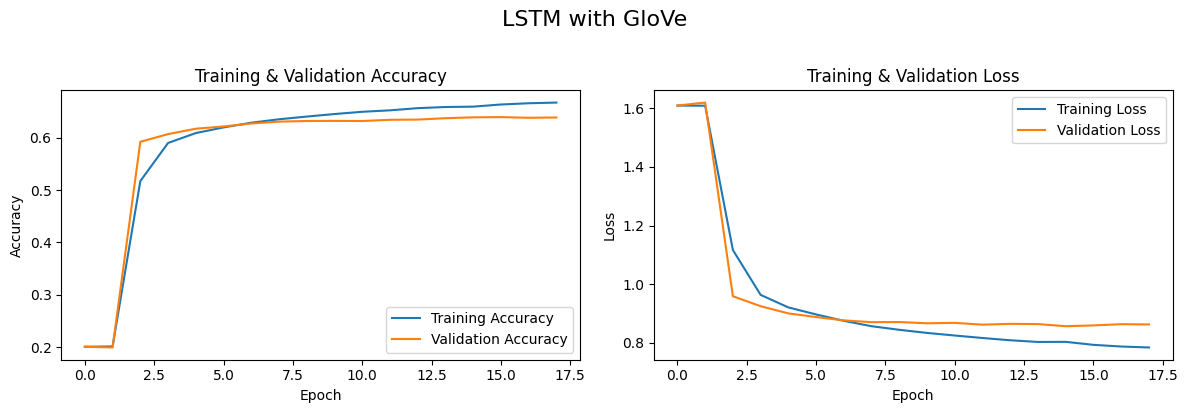

In [ ]:
visualize_loss_accuracy(history_lstm_glove, title='LSTM with GloVe')

### Accuracy - LSTM with GloVe

In [ ]:
test_loss, test_accuracy = model_lstm_glove.evaluate(testing_padded, encoded_test_labels)
print(f'Test Accuracy: {test_accuracy}')

742/742 [==============================] - 7s 10ms/step - loss: 0.9438 - accuracy: 0.6219
Test Accuracy: 0.6219224333763123


### Classification Report - LSTM with GloVe

In [ ]:
predictions = model_lstm_glove.predict(testing_padded)
predicted_labels = label_encoder.inverse_transform(predictions.argmax(axis=1))

742/742 [==============================] - 6s 8ms/step


In [ ]:
print("Classification Report:")
print(classification_report(y_test, predicted_labels))

Classification Report:
              precision    recall  f1-score   support

           1       0.48      0.58      0.53       690
           2       0.25      0.48      0.33      1075
           3       0.35      0.59      0.44      3014
           4       0.58      0.37      0.45      6225
           5       0.83      0.77      0.80     12716

    accuracy                           0.62     23720
   macro avg       0.50      0.56      0.51     23720
weighted avg       0.67      0.62      0.63     23720



### Confusion Matrix - LSTM with GloVe

In [ ]:
conf_matrix = confusion_matrix(y_test, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix - LSTM with GloVe')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

NameError: name 'confusion_matrix' is not defined

# Hyperparameter tuning

In [ ]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 3.0 MB/s eta 0:00:00


In [ ]:
import keras_tuner as kt

In [ ]:
embedding_dim_glove = 300 # Based on the Glove embedding

In [ ]:
def build_model(hp):
    model = Sequential()

    # Add Embedding layer without tuning options
    model.add(Embedding(input_dim=vocab_size,
                        output_dim=embedding_dim_glove,
                        trainable=False,
                        weights=[embedding_matrix]))

    # Tune spatial dropout rate
    model.add(SpatialDropout1D(hp.Float('spatial_dropout', min_value=0.2, max_value=0.5, step=0.1)))

    # Tune LSTM units
    model.add(LSTM(hp.Int('lstm_units', min_value=64, max_value=128, step=32), return_sequences=False))

    # Tune dropout rate
    model.add(Dropout(hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.1)))

    model.add(Dense(5, activation='softmax'))

    # Initialize the learning rate choices and optimizer
    lr = hp.Choice("learning_rate", values=[1e-1, 1e-2, 1e-3])

    # Use Adam optimizer with the tuned learning rate
    optimizer = Adam(learning_rate=lr)

    # Compile the model
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [ ]:
def build_model_final(spatial_dropout, lstm_units, dropout, learning_rate):
    model = Sequential()

    embedding_dim = 300 # Based on the Glove embedding

    model = Sequential()
    model.add(Embedding(input_dim=vocab_size,
                                  output_dim=embedding_dim,
                                  trainable = False,
                                  weights=[embedding_matrix]))

    model.add(SpatialDropout1D(spatial_dropout))
    model.add(LSTM(lstm_units, return_sequences=False))
    model.add(Dropout(dropout))
    model.add(Dense(5, activation='softmax'))

    optimizer = Adam(learning_rate=learning_rate)

    # Compile the model
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [ ]:
# Instantiate the tuner
tuner = kt.RandomSearch(build_model,
                     objective='val_accuracy',
                     max_trials=2,
                     # factor=3,
                     directory='/content/drive/MyDrive/Colab Notebooks/keras_tuner',
                     project_name='text_classification_tuning_3')

Reloading Tuner from /content/drive/MyDrive/Colab Notebooks/keras_tuner/text_classification_tuning_3/tuner0.json


### Defining the callbacks

In [ ]:
# Define a learning rate scheduler callback
def lr_scheduler(epoch, lr):
    return lr * 0.9  # Adjust this function based on your learning rate schedule

lr_schedule = LearningRateScheduler(lr_scheduler, verbose=1)

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

### Perform the search

In [ ]:
tuner.search(training_padded,
             encoded_train_labels,
             epochs=num_epochs,
             validation_data=(val_padded, encoded_val_labels),
             #callbacks=[lr_schedule, early_stopping],
             callbacks=[early_stopping],
             batch_size=batch_size)

Trial 2 Complete [00h 10m 18s]
val_accuracy: 0.4312516450881958

Best val_accuracy So Far: 0.6331733465194702
Total elapsed time: 00h 58m 53s


In [ ]:
tuner.results_summary()

Results summary
Results in /content/drive/MyDrive/Colab Notebooks/keras_tuner/text_classification_tuning_3
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0 summary
Hyperparameters:
spatial_dropout: 0.30000000000000004
lstm_units: 64
dropout: 0.30000000000000004
learning_rate: 0.001
Score: 0.6331733465194702

Trial 1 summary
Hyperparameters:
spatial_dropout: 0.2
lstm_units: 64
dropout: 0.2
learning_rate: 0.01
Score: 0.4312516450881958


In [ ]:
# get the best model
best_model = tuner.get_best_models(num_models=1)[0]
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 300)         145325100 
                                                                 
 spatial_dropout1d (Spatial  (None, None, 300)         0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 64)                93440     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 5)                 325       
                                                                 
Total params: 145418865 (554.73 MB)
Trainable params: 93765 (366.27 KB)
Non-trainable params: 145325100 (554.37 MB)
______

In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_accuracy = tuner.oracle.get_best_trials(num_trials=1)[0].score
print(best_accuracy)

0.6331733465194702


# Train on optimal params

In [ ]:
final_model = build_model_final(spatial_dropout = 0.30000000000000004,
                                lstm_units = 64,
                                dropout = 0.30000000000000004,
                                learning_rate = 0.001)

In [ ]:
final_model.fit(training_padded,
                encoded_train_labels,
                epochs=num_epochs,
                batch_size=batch_size,
                verbose=1)

Epoch 1/30
3859/3859 [==============================] - 107s 27ms/step - loss: 1.6093 - accuracy: 0.2010
Epoch 2/30
3859/3859 [==============================] - 100s 26ms/step - loss: 1.5931 - accuracy: 0.2197
Epoch 3/30
3859/3859 [==============================] - 110s 28ms/step - loss: 1.4341 - accuracy: 0.3225
Epoch 4/30
3859/3859 [==============================] - 108s 28ms/step - loss: 1.0614 - accuracy: 0.5492
Epoch 5/30
3859/3859 [==============================] - 103s 27ms/step - loss: 0.9732 - accuracy: 0.5884
Epoch 6/30
3859/3859 [==============================] - 102s 26ms/step - loss: 0.9455 - accuracy: 0.6003
Epoch 7/30
3859/3859 [==============================] - 103s 27ms/step - loss: 0.9284 - accuracy: 0.6075
Epoch 8/30
3859/3859 [==============================] - 103s 27ms/step - loss: 0.9178 - accuracy: 0.6112
Epoch 9/30
3859/3859 [==============================] - 103s 27ms/step - loss: 0.9085 - accuracy: 0.6150
Epoch 10/30
3859/3859 [==============================] 

In [ ]:
test_loss, test_accuracy = final_model.evaluate(testing_padded, encoded_test_labels)
print(f'Test Accuracy: {test_accuracy}')

742/742 [==============================] - 7s 9ms/step - loss: 0.8941 - accuracy: 0.6419
Test Accuracy: 0.6418634057044983


In [ ]:
predictions = final_model.predict(testing_padded)
predicted_labels = label_encoder.inverse_transform(predictions.argmax(axis=1))

742/742 [==============================] - 10s 12ms/step


In [ ]:
print("Classification Report:")
print(classification_report(y_test, predicted_labels))

Classification Report:
              precision    recall  f1-score   support

           1       0.49      0.60      0.54       690
           2       0.27      0.41      0.33      1075
           3       0.43      0.55      0.48      3014
           4       0.53      0.52      0.52      6225
           5       0.84      0.75      0.79     12716

    accuracy                           0.64     23720
   macro avg       0.51      0.57      0.53     23720
weighted avg       0.67      0.64      0.65     23720



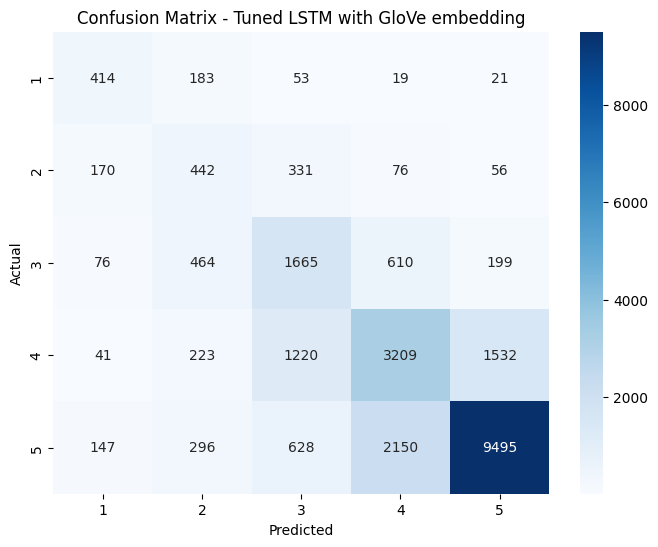

In [ ]:
conf_matrix = confusion_matrix(y_test, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix - Tuned LSTM with GloVe embedding')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Comparison of Shallow Learner and RNN Models

In [5]:
lstm_metrics = {
    'Accuracy': 0.64,
    'Precision': 0.7536,
    'Recall': 0.6639,
    'F1-Score': 0.7061
}

gradient_metrics = {
    'Accuracy': 0.5510,
    'Precision': 0.6407,
    'Recall': 0.5510,
    'F1-Score': 0.5773
}


df_model1 = pd.DataFrame(list(lstm_metrics.items()), columns=['Metric', 'LSTM with GloVe'])
df_model2 = pd.DataFrame(list(gradient_metrics.items()), columns=['Metric', 'Gradient Boosting'])

df_comparison = pd.merge(df_model1, df_model2, on='Metric')

# Print or display the DataFrame
pd.DataFrame(df_comparison)

,Metric,LSTM with GloVe,Gradient Boosting
0,Accuracy,0.6400,0.5510
1,Precision,0.7536,0.6407
2,Recall,0.6639,0.5510
3,F1-Score,0.7061,0.5773
